In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import stats
from sklearn.preprocessing import StandardScaler

font_size = 15
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

In [4]:
y = np.recfromtxt('data/distribution_fitting_weibull.txt')
ss = StandardScaler().fit(y.reshape(-1, 1))
y_std = ss.transform(y.reshape(-1, 1)).reshape(-1, )

# Fitting a Exponentiated Weibull distribution
dist = getattr(stats, 'exponweib')
t0 = time.time()
param_1 = dist.fit(y)
t1 = time.time()
param_2 = dist.fit(y_std)
t2 = time.time()

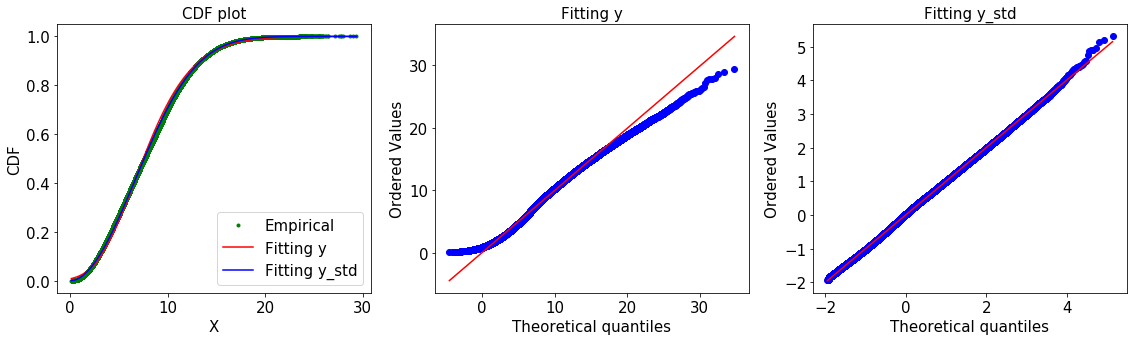

Parameters of fitting y: a=246.25, c=2.99, loc=-51.87, scale=32.81
Running time: 53 s
Parameters of fitting y: a=0.79, c=2.35, loc=-1.94, scale=2.42
Running time: 49 s


In [6]:
# Plot results
fig = plt.figure(figsize=(16,5))
# CDF comparison
plt.subplot(1,3,1)
n = len(y)
F = ((np.arange(n) + 1) - 0.44) / (n + 0.12) # Empirical CDF
plt.plot(np.sort(y), F, 'g.', label='Empirical')
sy = np.linspace(y.min(), y.max(), 100)
sy_std = np.linspace(y_std.min(), y_std.max(), 100)
plt.plot(sy, dist.cdf(sy, *param_1[:-2], loc=param_1[-2], scale=param_1[-1]),
         'r-', label='Fitting y')
plt.plot(ss.inverse_transform(sy_std),
         dist.cdf(sy_std, *param_2[:-2], loc=param_2[-2], scale=param_2[-1]),
         'b-', label='Fitting y_std')
plt.xlabel('X')
plt.ylabel('CDF')
plt.title('CDF plot')
plt.legend(loc='best')
plt.tight_layout()
# QQ plot for fitting y
plt.subplot(1,3,2)
stats.probplot(y, sparams=param_1, dist=dist, plot=plt)
plt.title('Fitting y')
plt.tight_layout()
# QQ plot for fitting y_std
plt.subplot(1,3,3)
stats.probplot(y_std.reshape(-1, ), sparams=param_2, dist=dist, plot=plt)
plt.title('Fitting y_std')
plt.tight_layout()
plt.show()

print('Parameters of fitting y: a={:.2f}, c={:.2f}, loc={:.2f}, scale={:.2f}'.format(*param_1))
print('Running time: {:.0f} s'.format(t1 - t0))
print('Parameters of fitting y: a={:.2f}, c={:.2f}, loc={:.2f}, scale={:.2f}'.format(*param_2))
print('Running time: {:.0f} s'.format(t2 - t1))